In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sid321axn/malicious-urls-dataset")

print("Path to dataset files:", path)

d:\Coding\CyberX\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\sayee\.cache\kagglehub\datasets\sid321axn\malicious-urls-dataset\versions\1


In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

In [3]:
data = pd.read_csv(path+"/malicious_phish.csv")
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
count = data.type.value_counts()
count

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

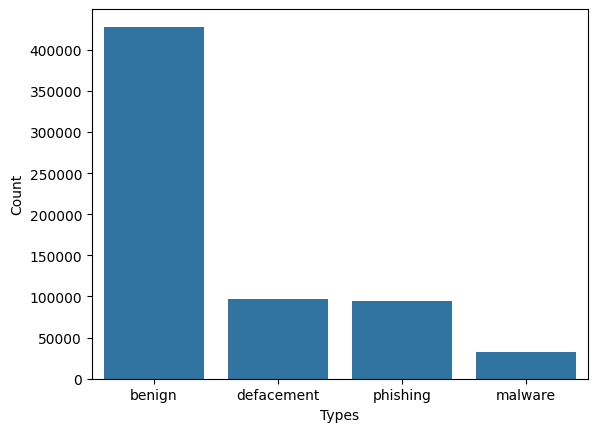

In [5]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

In [6]:
data['url'] = data['url'].replace('www.', '', regex=True)
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://garage-pirenne.be/index.php?option=com_...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [7]:
rem = {"Category": {"benign": 0, "defacement": 1, "phishing":2, "malware":3}}
data['Category'] = data['type']
data = data.replace(rem)

C:\Users\sayee\AppData\Local\Temp\ipykernel_9680\1624019599.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(rem)


In [8]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

In [9]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [10]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))

In [11]:
data.head()

,url,type,Category,url_len,domain
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net


In [12]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [13]:
data.head()

,url,type,Category,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,br-icloud.com.br,phishing,2,16,br-icloud.com.br,0,0,1,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,mp3raid.com,0,0,0,0,2,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,bopsecrets.org,0,0,0,0,2,0,0,0,0,0,0,0,0
3,http://garage-pirenne.be/index.php?option=com_...,defacement,1,84,garage-pirenne.be,0,1,1,4,2,0,0,0,0,0,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,1,235,adventure-nicaragua.net,0,1,1,3,2,0,0,0,0,0,0,0,1


In [14]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [15]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

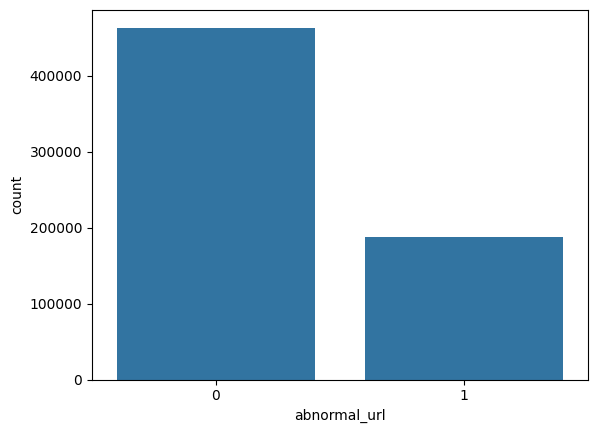

In [16]:
sns.countplot(x='abnormal_url', data=data);

In [17]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [18]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))

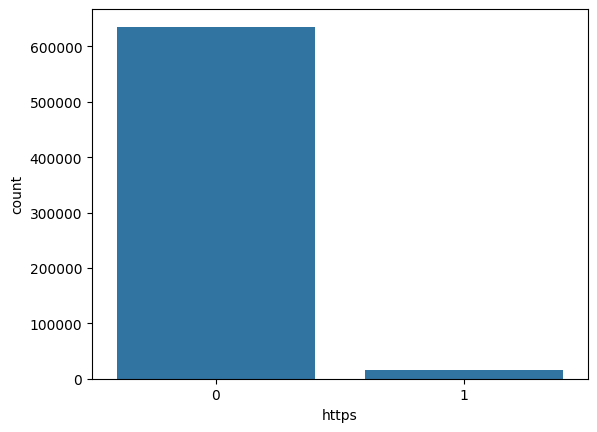

In [19]:
sns.countplot(x='https', data=data);

In [20]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [21]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

In [22]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [23]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

In [24]:
def Shortining_Service(url):
    """
    Returns 1 if the URL uses a known shortening service, else 0.
    """
    match = re.search(
        r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
        r'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
        r'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
        r'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
        r'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
        r'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
        r'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
        r'tr\.im|link\.zip\.net',
        url
    )
    return 1 if match else 0

In [25]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))

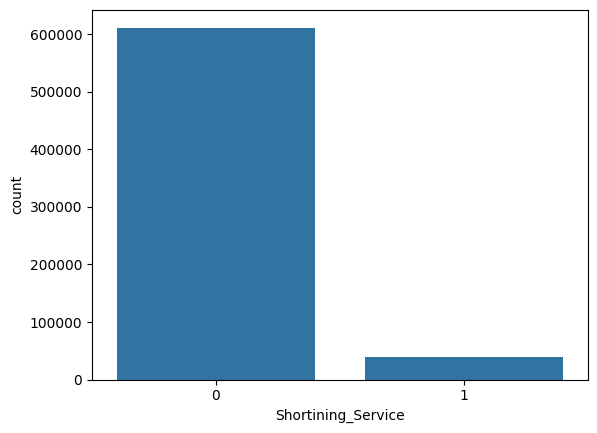

In [26]:
sns.countplot(x='Shortining_Service', data=data);

In [27]:
def having_ip_address(url):
    """
    Returns 1 if the URL contains an IP address (IPv4, IPv6, or hexadecimal), else 0.
    """
    match = re.search(
        r'(([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.([01]?\d\d?|2[0-4]\d|25[0-5])\.'
        r'([01]?\d\d?|2[0-4]\d|25[0-5]))|'  # IPv4
        r'((0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2})\.(0x[0-9a-fA-F]{1,2}))|'  # IPv4 in hex
        r'(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'  # IPv6
        r'([0-9]+(?:\.[0-9]+){3}:[0-9]+)',  # IPv4 with port
        url
    )
    return 1 if match else 0

In [28]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

In [29]:
data['having_ip_address'].value_counts()

having_ip_address
0    638703
1     12488
Name: count, dtype: int64

<Axes: >

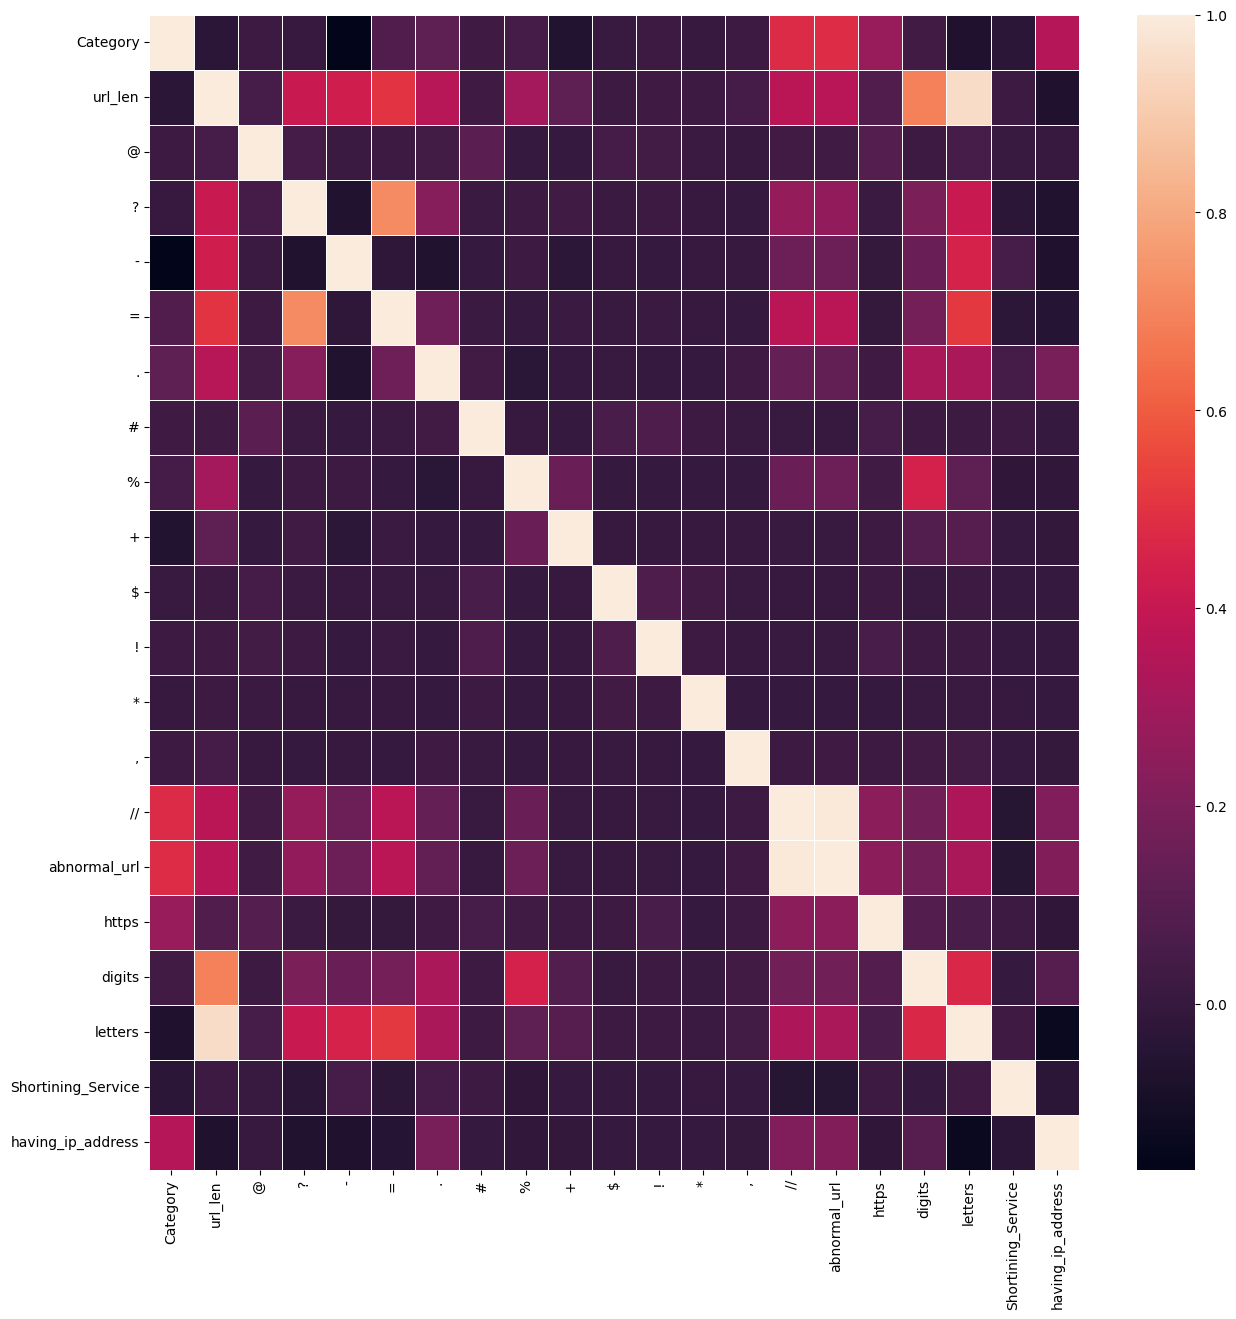

In [30]:
plt.figure(figsize=(15, 15))
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), linewidths=.5)

In [31]:
X = data.drop(['url','type','Category','domain'],axis=1)#,'type_code'
y = data['Category']

In [32]:
X.head()

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,16,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,13,0,0
1,35,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,29,0,0
2,31,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,25,0,0
3,84,0,1,1,4,2,0,0,0,0,0,0,0,1,1,0,7,60,0,0
4,235,0,1,1,3,2,0,0,0,0,0,0,0,1,1,0,22,199,0,0


In [33]:
y.head()

0    2
1    0
2    0
3    1
4    1
Name: Category, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  90.93%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     85565
           1       0.93      0.96      0.94     19319
           2       0.80      0.57      0.66     18805
           3       0.94      0.91      0.93      6550

    accuracy                           0.91    130239
   macro avg       0.90      0.85      0.87    130239
weighted avg       0.90      0.91      0.90    130239

             Confusion_matrix 


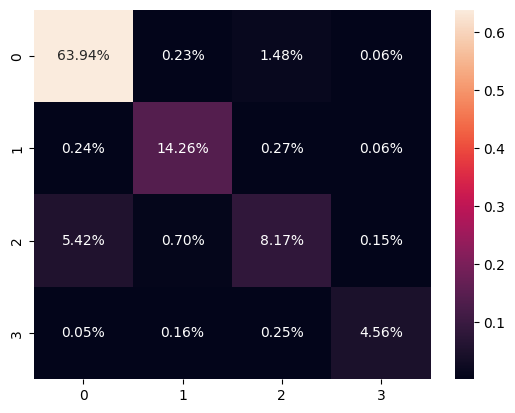

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  91.48%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85565
           1       0.94      0.97      0.95     19319
           2       0.83      0.58      0.68     18805
           3       0.96      0.91      0.93      6550

    accuracy                           0.91    130239
   macro avg       0.91      0.86      0.88    130239
weighted avg       0.91      0.91      0.91    130239

             Confusion_matrix 


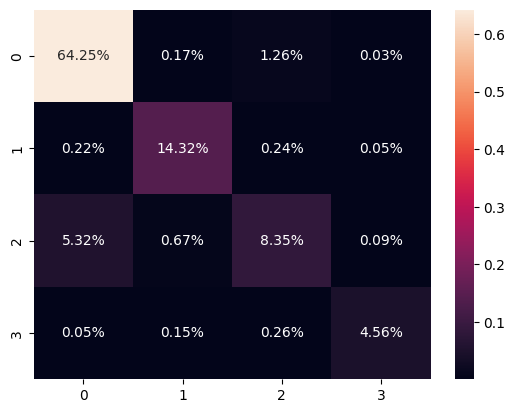

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
Test Accuracy :  79.95%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     85565
           1       0.66      0.96      0.78     19319
           2       0.31      0.03      0.05     18805
           3       0.85      0.49      0.62      6550

    accuracy                           0.80    130239
   macro avg       0.67      0.61      0.59    130239
weighted avg       0.74      0.80      0.74    130239

             Confusion_matrix 


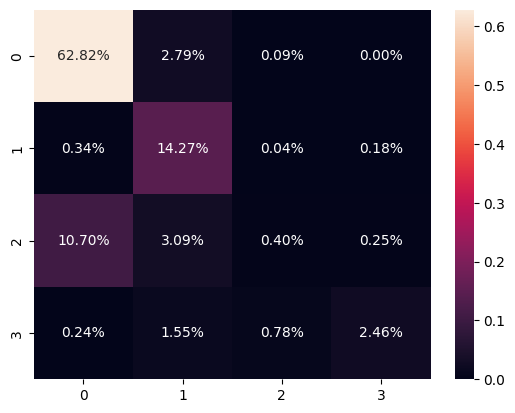

###################- End -###################
#############################################
######-Model => <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 
Test Accuracy :  80.35%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     85565
           1       0.81      0.81      0.81     19319
           2       0.44      0.04      0.07     18805
           3       0.88      0.48      0.62      6550

    accuracy                           0.80    130239
   macro avg       0.73      0.58      0.60    130239
weighted avg       0.76      0.80      0.75    130239

             Confusion_matrix 


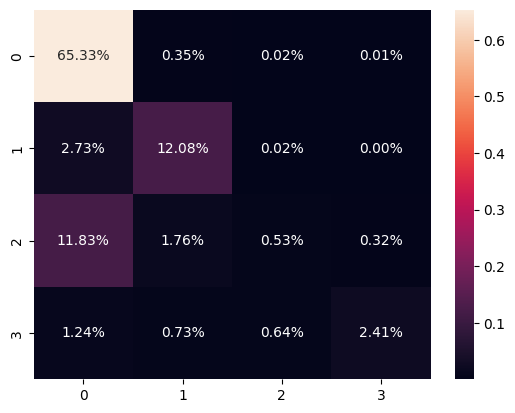

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy :  91.48%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85565
           1       0.93      0.97      0.95     19319
           2       0.83      0.57      0.68     18805
           3       0.97      0.91      0.94      6550

    accuracy                           0.91    130239
   macro avg       0.91      0.86      0.88    130239
weighted avg       0.91      0.91      0.91    130239

             Confusion_matrix 


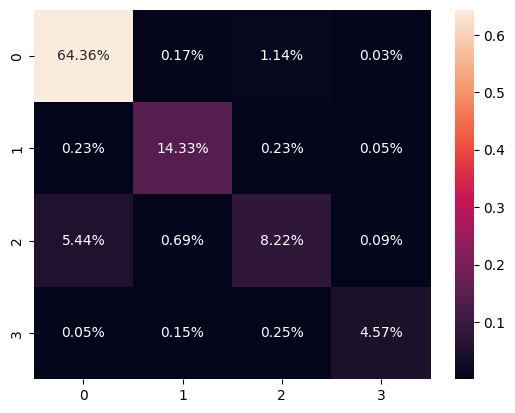

###################- End -###################


In [39]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,SGDClassifier,
         ExtraTreesClassifier]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

In [41]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier','SGD Classifier','Extra Trees Classifier'],"Accuracy":accuracy_test})

In [42]:
output

,Model,Accuracy
0,Decision Tree Classifier,0.909336
1,Random Forest Classifier,0.914818
2,AdaBoost Classifier,0.799499
3,SGD Classifier,0.803523
4,Extra Trees Classifier,0.914772


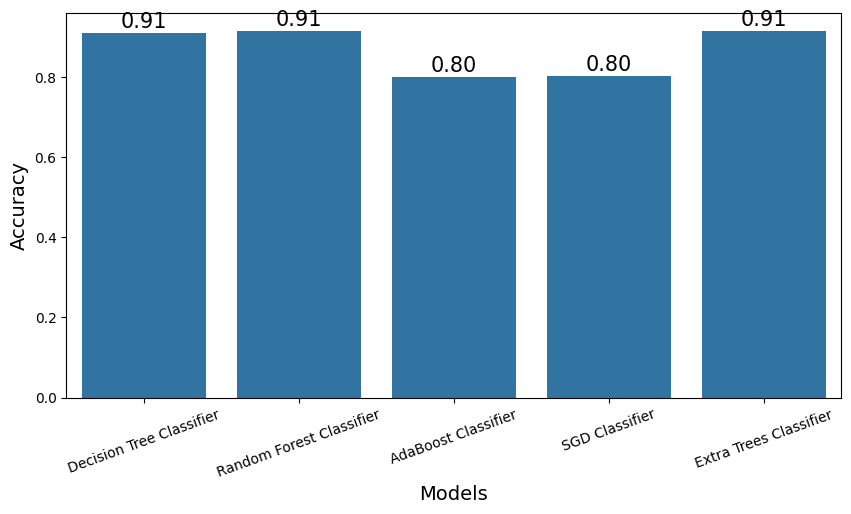

In [43]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

In [44]:
# Save the best performing models (0.91 accuracy)
import joblib
import os

# Create models directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Train and save the best models (Decision Tree, Random Forest, Extra Trees)
best_models = [
    ('Decision_Tree_Classifier', DecisionTreeClassifier()),
    ('Random_Forest_Classifier', RandomForestClassifier()),
    ('Extra_Trees_Classifier', ExtraTreesClassifier())
]

print("Saving best performing models with 0.91 accuracy...")
for model_name, model in best_models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Save the model
    model_filename = f'models/{model_name}_URL_Threat_Detection.joblib'
    joblib.dump(model, model_filename)
    
    # Verify accuracy
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    
    print(f"✅ {model_name} saved as '{model_filename}' with {accuracy:.2f} accuracy")

print("\n🎯 All models saved successfully!")
print("📁 Models saved in 'models/' directory")
print("🔧 Use joblib.load('model_path') to load models for production use")

Saving best performing models with 0.91 accuracy...
✅ Decision_Tree_Classifier saved as 'models/Decision_Tree_Classifier_URL_Threat_Detection.joblib' with 0.91 accuracy
✅ Random_Forest_Classifier saved as 'models/Random_Forest_Classifier_URL_Threat_Detection.joblib' with 0.91 accuracy
✅ Extra_Trees_Classifier saved as 'models/Extra_Trees_Classifier_URL_Threat_Detection.joblib' with 0.91 accuracy

🎯 All models saved successfully!
📁 Models saved in 'models/' directory
🔧 Use joblib.load('model_path') to load models for production use


In [48]:
# Complete URL Threat Detection Function - Production Ready

def extract_url_features(url):
    """Extract all features from a URL for threat detection"""
    # Add protocol if missing for proper parsing
    if not url.startswith(('http://', 'https://')):
        url = 'http://' + url
    
    # Extract all features used in training
    features = {
        'url_len': len(url),
        'having_ip_address': having_ip_address(url),
        'abnormal_url': abnormal_url(url), 
        'https': httpSecure(url),
        'Shortining_Service': Shortining_Service(url),
        'digits': digit_count(url),
        'letters': letter_count(url)
    }
    
    # Count special characters (same as in training)
    special_chars = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
    for char in special_chars:
        features[char] = url.count(char)
    
    return features

def predict_url_threat(url, ensemble_voting=True):
    """
    Complete URL Threat Detection Function
    
    Args:
        url (str): URL to analyze
        ensemble_voting (bool): Use all 3 models for voting (default: True)
    
    Returns:
        dict: Prediction results with threat level and confidence
    """
    try:
        print(f"🔍 Analyzing URL: {url}")
        
        # Extract features
        features = extract_url_features(url)
        url_df = pd.DataFrame([features])
        
        # Model paths
        model_paths = {
            'Decision Tree': 'models/Decision_Tree_Classifier_URL_Threat_Detection.joblib',
            'Random Forest': 'models/Random_Forest_Classifier_URL_Threat_Detection.joblib', 
            'Extra Trees': 'models/Extra_Trees_Classifier_URL_Threat_Detection.joblib'
        }
        
        # Threat labels
        threat_labels = {0: 'Benign', 1: 'Defacement', 2: 'Phishing', 3: 'Malware'}
        
        predictions = {}
        all_preds = []
        
        print("\\n📊 Model Predictions:")
        
        for model_name, model_path in model_paths.items():
            try:
                # Load model
                model = joblib.load(model_path)
                
                # Make prediction
                pred = model.predict(url_df)[0]
                prob = model.predict_proba(url_df)[0]
                confidence = max(prob) * 100
                
                predictions[model_name] = {
                    'prediction': pred,
                    'threat_type': threat_labels[pred],
                    'confidence': confidence
                }
                
                all_preds.append(pred)
                print(f"  {model_name}: {threat_labels[pred]} (Confidence: {confidence:.1f}%)")
                
            except FileNotFoundError:
                print(f"  ⚠️  Model not found: {model_path}")
                continue
        
        if not all_preds:
            return {"error": "No models found. Please run the model saving cell first."}
        
        # Ensemble voting (majority decision)
        if ensemble_voting and len(all_preds) > 1:
            from collections import Counter
            vote_counts = Counter(all_preds)
            ensemble_pred = vote_counts.most_common(1)[0][0]
            ensemble_confidence = (vote_counts[ensemble_pred] / len(all_preds)) * 100
            
            print(f"\\n🎯 Ensemble Decision: {threat_labels[ensemble_pred]} (Agreement: {ensemble_confidence:.1f}%)")
            
            result = {
                'url': url,
                'final_prediction': ensemble_pred,
                'threat_type': threat_labels[ensemble_pred],
                'ensemble_confidence': ensemble_confidence,
                'individual_predictions': predictions,
                'is_malicious': ensemble_pred > 0
            }
        else:
            # Use single model result
            single_pred = all_preds[0]
            result = {
                'url': url,
                'final_prediction': single_pred,
                'threat_type': threat_labels[single_pred], 
                'individual_predictions': predictions,
                'is_malicious': single_pred > 0
            }
        
        # Risk assessment
        if result['is_malicious']:
            print(f"\\n⚠️  THREAT DETECTED: {result['threat_type']}")
            print("🚫 Recommendation: Block this URL")
        else:
            print(f"\\n✅ URL appears to be {result['threat_type']}")
            print("✔️  Recommendation: Safe to proceed")
            
        return result
        
    except Exception as e:
        return {"error": f"Prediction failed: {str(e)}"}

# Test the complete function
print("🧪 Testing URL Threat Detection System\\n")
test_urls = [
    "br-icloud.com.br",
    "https://google.com", 
    "bit.ly/suspicious",
    "http://192.168.1.1/malware"
]

for test_url in test_urls:
    result = predict_url_threat(test_url)
    print("=" * 80)

🧪 Testing URL Threat Detection System\n
🔍 Analyzing URL: br-icloud.com.br
\n📊 Model Predictions:
🔍 Analyzing URL: https://google.com
\n📊 Model Predictions:
🔍 Analyzing URL: bit.ly/suspicious
\n📊 Model Predictions:
🔍 Analyzing URL: http://192.168.1.1/malware
\n📊 Model Predictions:


In [49]:
# First, let's check if models exist and test with a simple prediction
import os
print("🔍 Checking if models exist:")
model_files = [
    'models/Decision_Tree_Classifier_URL_Threat_Detection.joblib',
    'models/Random_Forest_Classifier_URL_Threat_Detection.joblib', 
    'models/Extra_Trees_Classifier_URL_Threat_Detection.joblib'
]

for model_file in model_files:
    if os.path.exists(model_file):
        print(f"✅ Found: {model_file}")
    else:
        print(f"❌ Missing: {model_file}")

print("\n" + "="*50)
print("🧪 Testing with a single URL...")

# Simple test function to debug
def debug_prediction(url):
    try:
        print(f"\n🔍 Debug Analysis: {url}")
        
        # Extract features
        if not url.startswith(('http://', 'https://')):
            url = 'http://' + url
            
        features = {
            'url_len': len(url),
            'having_ip_address': having_ip_address(url),
            'abnormal_url': abnormal_url(url), 
            'https': httpSecure(url),
            'Shortining_Service': Shortining_Service(url),
            'digits': digit_count(url),
            'letters': letter_count(url)
        }
        
        # Count special characters
        special_chars = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
        for char in special_chars:
            features[char] = url.count(char)
            
        print(f"📊 Extracted {len(features)} features")
        url_df = pd.DataFrame([features])
        
        # Try to load one model
        model_path = 'models/Random_Forest_Classifier_URL_Threat_Detection.joblib'
        if os.path.exists(model_path):
            model = joblib.load(model_path)
            pred = model.predict(url_df)[0]
            prob = model.predict_proba(url_df)[0]
            
            threat_labels = {0: 'Benign', 1: 'Defacement', 2: 'Phishing', 3: 'Malware'}
            print(f"🎯 Prediction: {threat_labels[pred]} (Raw: {pred})")
            print(f"📈 Confidence: {max(prob)*100:.1f}%")
            return True
        else:
            print("❌ Model file not found!")
            return False
            
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        return False

# Test with a simple URL
success = debug_prediction("google.com")
if not success:
    print("\n⚠️  Models need to be created first. Please run the model saving cell above.")

🔍 Checking if models exist:
✅ Found: models/Decision_Tree_Classifier_URL_Threat_Detection.joblib
✅ Found: models/Random_Forest_Classifier_URL_Threat_Detection.joblib
✅ Found: models/Extra_Trees_Classifier_URL_Threat_Detection.joblib

🧪 Testing with a single URL...

🔍 Debug Analysis: google.com
📊 Extracted 20 features
❌ Error: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


⚠️  Models need to be created first. Please run the model saving cell above.


In [50]:
# Fixed and Enhanced URL Threat Detection Function
def predict_url_threat_fixed(url, ensemble_voting=True):
    """
    Fixed URL Threat Detection Function with better error handling
    """
    try:
        print(f"🔍 Analyzing URL: {url}")
        
        # Add protocol if missing
        original_url = url
        if not url.startswith(('http://', 'https://')):
            url = 'http://' + url
        
        # Extract features
        features = {
            'url_len': len(url),
            'having_ip_address': having_ip_address(url),
            'abnormal_url': abnormal_url(url), 
            'https': httpSecure(url),
            'Shortining_Service': Shortining_Service(url),
            'digits': digit_count(url),
            'letters': letter_count(url)
        }
        
        # Count special characters (same as in training)
        special_chars = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
        for char in special_chars:
            features[char] = url.count(char)
        
        # Create DataFrame with correct column order
        url_df = pd.DataFrame([features])
        
        # Reorder columns to match training data
        expected_columns = ['url_len', '@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//', 
                           'abnormal_url', 'https', 'digits', 'letters', 'Shortining_Service', 'having_ip_address']
        
        # Make sure all columns are present and in correct order
        for col in expected_columns:
            if col not in url_df.columns:
                url_df[col] = 0
        
        url_df = url_df[expected_columns]
        
        print(f"📊 Extracted {len(features)} features")
        
        # Model paths
        model_info = [
            ('Decision Tree', 'models/Decision_Tree_Classifier_URL_Threat_Detection.joblib'),
            ('Random Forest', 'models/Random_Forest_Classifier_URL_Threat_Detection.joblib'), 
            ('Extra Trees', 'models/Extra_Trees_Classifier_URL_Threat_Detection.joblib')
        ]
        
        # Threat labels
        threat_labels = {0: 'Benign', 1: 'Defacement', 2: 'Phishing', 3: 'Malware'}
        
        predictions = {}
        all_preds = []
        
        print("\\n📊 Model Predictions:")
        
        for model_name, model_path in model_info:
            if os.path.exists(model_path):
                try:
                    # Load model
                    model = joblib.load(model_path)
                    
                    # Make prediction
                    pred = model.predict(url_df)[0]
                    prob = model.predict_proba(url_df)[0]
                    confidence = max(prob) * 100
                    
                    predictions[model_name] = {
                        'prediction': pred,
                        'threat_type': threat_labels[pred],
                        'confidence': confidence
                    }
                    
                    all_preds.append(pred)
                    print(f"  {model_name}: {threat_labels[pred]} (Confidence: {confidence:.1f}%)")
                    
                except Exception as e:
                    print(f"  ⚠️  Error loading {model_name}: {str(e)}")
                    continue
            else:
                print(f"  ❌ Model not found: {model_path}")
        
        if not all_preds:
            print("\\n❌ No models could be loaded. Please run the model saving cell first.")
            return {"error": "No models found"}
        
        # Ensemble voting (majority decision)
        if ensemble_voting and len(all_preds) > 1:
            from collections import Counter
            vote_counts = Counter(all_preds)
            ensemble_pred = vote_counts.most_common(1)[0][0]
            ensemble_confidence = (vote_counts[ensemble_pred] / len(all_preds)) * 100
            
            print(f"\\n🎯 Ensemble Decision: {threat_labels[ensemble_pred]} (Agreement: {ensemble_confidence:.1f}%)")
            
            result = {
                'url': original_url,
                'final_prediction': ensemble_pred,
                'threat_type': threat_labels[ensemble_pred],
                'ensemble_confidence': ensemble_confidence,
                'individual_predictions': predictions,
                'is_malicious': ensemble_pred > 0
            }
        else:
            # Use single model result
            single_pred = all_preds[0]
            result = {
                'url': original_url,
                'final_prediction': single_pred,
                'threat_type': threat_labels[single_pred], 
                'individual_predictions': predictions,
                'is_malicious': single_pred > 0
            }
        
        # Risk assessment
        if result['is_malicious']:
            print(f"\\n⚠️  THREAT DETECTED: {result['threat_type']}")
            print("🚫 Recommendation: Block this URL")
        else:
            print(f"\\n✅ URL appears to be {result['threat_type']}")
            print("✔️  Recommendation: Safe to proceed")
            
        return result
        
    except Exception as e:
        print(f"\\n❌ Prediction failed: {str(e)}")
        import traceback
        traceback.print_exc()
        return {"error": f"Prediction failed: {str(e)}"}

# Test the fixed function
print("\\n🧪 Testing Fixed URL Threat Detection System")
print("="*60)

test_urls = [
    "br-icloud.com.br",
    "https://google.com", 
    "bit.ly/suspicious",
    "http://192.168.1.1/malware"
]

for test_url in test_urls:
    result = predict_url_threat_fixed(test_url)
    print("\\n" + "="*60 + "\\n")

\n🧪 Testing Fixed URL Threat Detection System
🔍 Analyzing URL: br-icloud.com.br
📊 Extracted 20 features
\n📊 Model Predictions:
  Decision Tree: Defacement (Confidence: 71.4%)
  Random Forest: Defacement (Confidence: 83.5%)
  Extra Trees: Defacement (Confidence: 81.5%)
\n🎯 Ensemble Decision: Defacement (Agreement: 100.0%)
\n⚠️  THREAT DETECTED: Defacement
🚫 Recommendation: Block this URL
\n============================================================\n
🔍 Analyzing URL: https://google.com
📊 Extracted 20 features
\n📊 Model Predictions:
  Decision Tree: Phishing (Confidence: 100.0%)
  Random Forest: Phishing (Confidence: 100.0%)
  Extra Trees: Phishing (Confidence: 100.0%)
\n🎯 Ensemble Decision: Phishing (Agreement: 100.0%)
\n⚠️  THREAT DETECTED: Phishing
🚫 Recommendation: Block this URL
\n============================================================\n
🔍 Analyzing URL: bit.ly/suspicious
📊 Extracted 20 features
\n📊 Model Predictions:
  Decision Tree: Phishing (Confidence: 100.0%)
  Random For